In [1]:
!pip install kaggle

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
from google.colab import files

# Upload kaggle.json file
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [7]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:08<00:00, 21.9MB/s]
100% 163M/163M [00:08<00:00, 19.7MB/s]


In [8]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()

# New Section

**Importing Dependencies**


In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('/content/data/with_mask')
without_mask_files = os.listdir('/content/data/without_mask')

In [11]:
print('Number of with mask images:',len(with_mask_files))
print('Number of without mask images:',len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**


 with mask--> 1 ,
 without mask --> 0

In [12]:
#create the labels

with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)
#creating labels list
labels = with_mask_labels+without_mask_labels


**Displaying the Images**

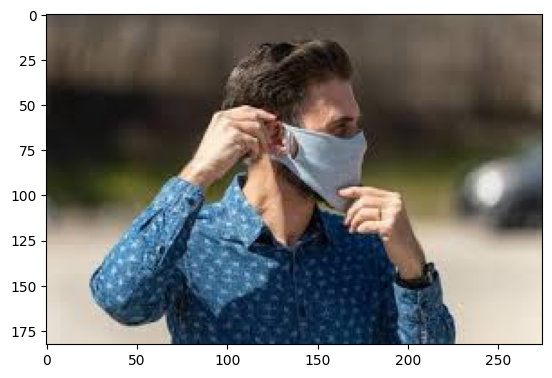

In [13]:
#displaying with mask image
#reading the image and displaying it as a numpy array
img = mpimg.imread('/content/data/with_mask/with_mask_2590.jpg')
imgplot = plt.imshow(img)
plt.show()

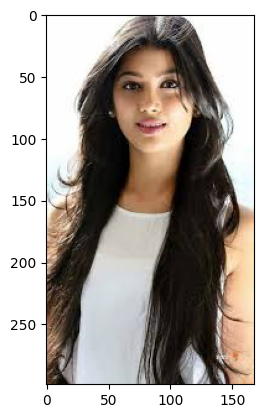

In [14]:
#displaying without mask image
#reading the image and displaying it as a numpy array
img = mpimg.imread('/content/data/without_mask/without_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image** **Processing**

1. Resize the images
2.Convert images to numpy array

In [15]:
# Convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'
data = []

# Iterate through each image with a mask
# Resize each image to a standard size of 128x128 pixels
# Convert images to RGB format for consistency
# Convert each image to a numpy array and append to the data list
for img_file in with_mask_files:
    image = Image.open(with_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image_array = np.array(image)
    data.append(image_array)

# Convert images to numpy arrays

without_mask_path = '/content/data/without_mask/'


# Iterate through each image without a mask
# Resize each image to a standard size of 128x128 pixels
# Convert images to RGB format for consistency
# Convert each image to a numpy array and append to the data list
for img_file in without_mask_files:
    image = Image.open(without_mask_path + img_file)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image_array = np.array(image)
    data.append(image_array)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [16]:
data[10].shape
#converting image list and label list to a numpy array

#Image list to np array
X= np.array(data)
#Label list to np array
Y= np.array(labels)

print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


Train Test Split

In [17]:
#Splitting my
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

#Scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building my CNN**

In [18]:
import tensorflow as tf
from tensorflow import keras

The basic structure of a CNN is that we have first layer of convolution, where convolution is applied on my matrix Image, the way it is done is that there is a matrix called kernel of a size of 3x3 in this case is scanned over my Image matrix, then we apply on it an activation function in this case Relu and get a feature map.
The next layer is the pooling to downsize the feature map while getting the important data out of it, in this case I use max pooling and the resulting size is 2x2.
These steps are done twice, then we flatten the pooled matrix to be an input Vector to input in the Deep dense layered NN.

In [19]:
#introducing my number of classes
num_of_classes = 2

#Creating the model
model = keras.Sequential()
#1st Conv layer, use 32 neurons, 3x3 kernel size and relu
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3))) #use 32 neurons for  128x128 Image with 3 RGB channels
#1st max pooling layer , pool size is 2x2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#2nd Conv layer 64 neurons, 3x3 kernel and relu
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
#2nd pooling layer , pool size is 2x2
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#flatten the feature map
model.add(keras.layers.Flatten())

#classification , use 128 neurons and relu, dropout 50%
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

#final layer for binary classification
model.add(keras.layers.Dense(num_of_classes,activation='sigmoid')) #sigmoid for binary classification




In [20]:
#compile the NN
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [21]:
#training the NN
history = model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 18s 24ms/step - loss: 0.4037 - acc: 0.8324 - val_loss: 0.2172 - val_acc: 0.9174
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.2605 - acc: 0.8928 - val_loss: 0.2024 - val_acc: 0.9289
Epoch 3/5
170/170 [==============================] - 4s 22ms/step - loss: 0.2254 - acc: 0.9080 - val_loss: 0.2078 - val_acc: 0.9438
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1805 - acc: 0.9290 - val_loss: 0.1592 - val_acc: 0.9388
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1362 - acc: 0.9470 - val_loss: 0.1607 - val_acc: 0.9421


Model Evaluation

In [22]:
loss,accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 12ms/step - loss: 0.1752 - acc: 0.9305
Test Accuracy = 0.9305095672607422


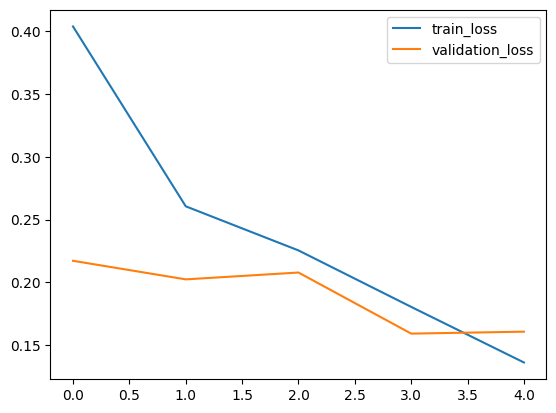

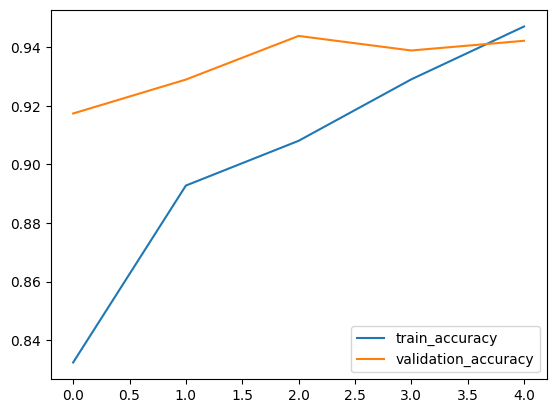

In [23]:
h = history

plt.plot(h.history['loss'],label = 'train_loss')
plt.plot(h.history['val_loss'],label = 'validation_loss')
plt.legend()
plt.show()


plt.plot(h.history['acc'],label = 'train_accuracy')
plt.plot(h.history['val_acc'],label = 'validation_accuracy')
plt.legend()
plt.show()

**Predictive** **System**

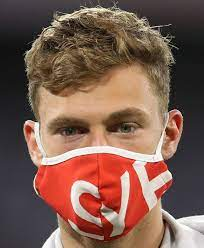

1/1 [==============================] - 0s 22ms/step
[[0.38033417 0.95441234]]
This person is wearing a mask


In [25]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Specify the path of the image
input_image_path = '/content/download.jpg'
# Try to read the image
input_image = cv2.imread(input_image_path)

# Check if the image is loaded successfully
if input_image is None:
    print(f"Error: Unable to read the image at path {input_image_path}")
else:
    cv2_imshow(input_image)

    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
    input_prediction = model.predict(input_image_reshaped)

    print(input_prediction)
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 1:
        print("This person is wearing a mask")
    else:
        print("This person is NOT wearing a mask")


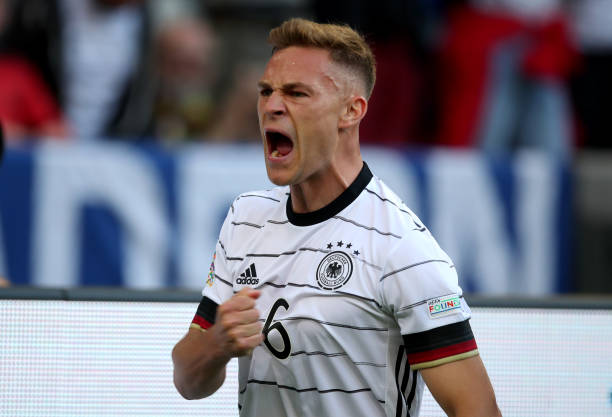

1/1 [==============================] - 0s 32ms/step
[[0.603692  0.5418278]]
This person is NOT wearing a mask


In [30]:
# Specify the path of the image
input_image_path = '/content/download (1).jpg'
# Try to read the image
input_image = cv2.imread(input_image_path)

# Check if the image is loaded successfully
if input_image is None:
    print(f"Error: Unable to read the image at path {input_image_path}")
else:
    cv2_imshow(input_image)

    input_image_resized = cv2.resize(input_image, (128, 128))
    input_image_scaled = input_image_resized / 255
    input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])
    input_prediction = model.predict(input_image_reshaped)

    print(input_prediction)
    input_pred_label = np.argmax(input_prediction)

    if input_pred_label == 1:
        print("This person is wearing a mask")
    else:
        print("This person is NOT wearing a mask")